This is a Julian fork of the 12 steps to Navier-Stokes (Python) [https://github.com/barbagroup/CFDPython] by Lorena A. Barba, Gilbert F. Forsyth . All content of that work is under Creative Commons Attribution CC-BY 4.0, and all python code is under BSD-3 clause. This work also derives from similar forks by Cysor [https://github.com/Cysor/CFDJulia] and by Wallace-dyfq [https://github.com/Wallace-dyfq/CFD-Julia-12-steps--o-Navier-Stokes-Equations]

Step 5: 2-D Linear Convection
----
***

Up to now, all of our work has been in one spatial dimension. We can learn a lot in just 1D, but let's grow up to flatland: two dimensions. 

In the following exercises, you will extend the first four steps to 2D. To extend the 1D finite-difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to $x$ is the variation in the $x$ direction *at constant* $y$.

In 2D space, a rectangular (uniform) grid is defined by the points with coordinates:

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Now, define $u_{i,j} = u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ *acting separately* on the $i$ and $j$ indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$.

Hence, for a first-order partial derivative in the $x$-direction, a finite-difference formula is:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

and similarly in the $y$ direction. Thus, we can write backward-difference, forward-difference or central-difference formulas for Steps 5 to 12. Let's get started!

The PDE governing 2-D Linear Convection is written as

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.  

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.  

With 1-D implementations, we used $i$ subscripts to denote movement in space (e.g. $u_{i}^n-u_{i-1}^n$).  Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in the regime.  

Here, we'll again use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values.  

With that in mind, our discretization of the PDE should be relatively straightforward.  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

As before, solve for the only unknown:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

We will solve this equation with the following initial conditions:

$$u(x) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

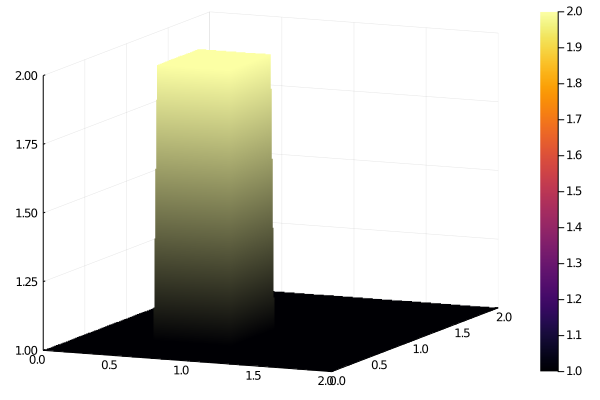

In [1]:
using Plots


nx = 81
ny = 81
nt = 100
    
c  = 1.0
    
Δx = 2.0 / (nx - 1)
Δy = 2.0 / (ny - 1)
    
σ  = 0.2
Δt = σ * Δx

x = range(0.0, stop=2.0, length=nx)
y = range(0.0, stop=2.0, length=ny)

u₀ = ones(ny, nx) 

u₀[0.5 .≤ y .≤ 1 , 0.5 .≤ x .≤ 1] .= 2.0

uⁿ⁺¹ = u₀
row, col = size(u₀)
    
s = surface(x,y,uⁿ⁺¹)


### Iterating in two dimensions


To evaluate the wave in two dimensions requires the use of several nested for-loops to cover all of the `i`'s and `j`'s.  Since Julia is not a compiled language there can be  slowdowns in the execution of code with multiple for-loops.  First try evaluating the 2D convection code and see what results it produces. 

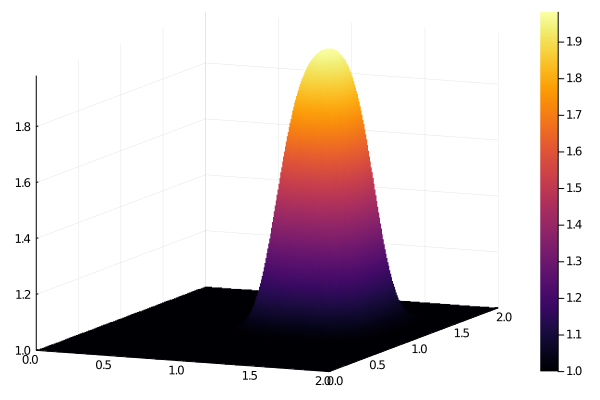

In [2]:
uⁿ = similar(u₀)

for n in 1:nt + 1
    
    uⁿ .= uⁿ⁺¹     # pre-allocation + in place operations instead of array copy
        
    for j in 1:row
        for i in 1:col
                # Implement boundary conditions using conditional (if/else) statements
            if j == 1
                uⁿ⁺¹[j,i] = 1.0
            elseif j == row
                uⁿ⁺¹[j,i] = 1.0
            elseif i == col
                uⁿ⁺¹[j,i] = 1.0
            elseif i == 1
                uⁿ⁺¹[j,i] = 1.0
            else
                uⁿ⁺¹[j,i] = (uⁿ[j, i] - 
                            (c*Δt/Δx * (uⁿ[j, i] - uⁿ[j, i - 1])) - 
                            (c*Δt/Δy * (uⁿ[j, i] - uⁿ[j - 1, i])))
            end
        end
    end
        
end

#s = surface(x,y,uⁿ⁺¹)
plot(x,y,uⁿ⁺¹,st=:surface)